In [2]:
import pandas as pd

In [3]:
df_reviews = pd.read_csv('IMDB Dataset.csv')

In [4]:
df_reviews

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df_reviews.value_counts('sentiment')

sentiment
negative    25000
positive    25000
Name: count, dtype: int64

In [9]:
df_test_positive =  df_reviews[df_reviews['sentiment'] == 'positive'][:9000]

In [11]:
df_test_negative =  df_reviews[df_reviews['sentiment'] == 'negative'][:1000]

In [12]:
df_test_negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [15]:
df_test_imb = pd.concat([df_test_negative, df_test_positive])

In [16]:
df_test_imb

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
18187,The Sea Is Watching has been made from an orig...,positive
18188,I used to watch this show when I was a little ...,positive
18189,John Leguizamo's one man show is both funnier ...,positive
18192,in a not so conventional sense of the word.<br...,positive


In [17]:
df_test_imb.value_counts('sentiment')

sentiment
positive    9000
negative    1000
Name: count, dtype: int64

<Axes: xlabel='sentiment'>

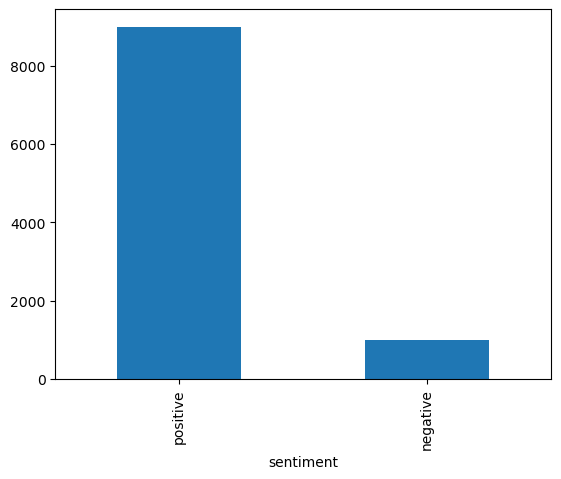

In [18]:
df_test_imb.value_counts('sentiment').plot(kind='bar')

In [19]:
length_negative = len(df_test_imb[df_test_imb['sentiment']=='negative'])

In [20]:
length_negative

1000

In [21]:
df_positive = df_test_imb[df_test_imb['sentiment']=='positive'].sample(n=length_negative)

In [22]:
df_positive

,review,sentiment
7382,Culled from the real life exploits of Chuck Co...,positive
17843,"The antiwar musical ""Hair"" is my number one cu...",positive
14427,"""The Luzhin Defence"" is, in the foreground, a ...",positive
18146,"In my opinion, Flatley ruined the first show w...",positive
3485,I saw this on the big screen and was encapsula...,positive
...,...,...
128,This movie was one of the best movies that I h...,positive
14971,(Spoilers warning) I cannot say enough good th...,positive
6889,A nicely done thriller with plenty of sex in i...,positive
8186,A Pentagon science team seem to have perfected...,positive


In [23]:
df_negative = df_test_imb[df_test_imb['sentiment']=='negative']

In [24]:
df_negative

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
2000,Stranded in Space (1972) MST3K version - a ver...,negative
2005,"I happened to catch this supposed ""horror"" fli...",negative
2007,waste of 1h45 this nasty little film is one to...,negative
2010,Warning: This could spoil your movie. Watch it...,negative


In [28]:
df_bal =  pd.concat([df_negative, df_positive], ignore_index=True)

In [29]:
df_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

In [30]:
df_bal

,review,sentiment
0,Basically there's a family where a little boy ...,negative
1,"This show was an amazing, fresh & innovative i...",negative
2,Encouraged by the positive comments about this...,negative
3,Phil the Alien is one of those quirky films wh...,negative
4,I saw this movie when I was about 12 when it c...,negative
...,...,...
1995,This movie was one of the best movies that I h...,positive
1996,(Spoilers warning) I cannot say enough good th...,positive
1997,A nicely done thriller with plenty of sex in i...,positive
1998,A Pentagon science team seem to have perfected...,positive


In [32]:
from imblearn.under_sampling  import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)

In [34]:
df_review_bal, df_review_bal['sentiment'] = rus.fit_resample(df_test_imb[['review']],  df_test_imb['sentiment'])

In [35]:
df_review_bal

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative
...,...,...
10833,Knute Rockne led an extraordinary life and his...,positive
1039,At the height of the 'Celebrity Big Brother' r...,positive
5255,This is another of Robert Altman's underrated ...,positive
12237,This movie won a special award at Cannes for i...,positive


In [37]:
df_review_bal.value_counts('sentiment')

sentiment
negative    1000
positive    1000
Name: count, dtype: int64

## import train_test_split

In [38]:
from sklearn.model_selection import train_test_split

In [61]:
train, test = train_test_split(df_review_bal, test_size=0.25, random_state=51)

In [62]:
test

,review,sentiment
8372,There was a recent documentary on making movie...,positive
1785,The Nest is really just another 'nature run am...,negative
862,From the decrepit ranks of the already over-sa...,negative
354,"Like the previous poster, I am from northern V...",negative
12146,"In this documentary we meet Roger, the rich ma...",positive
...,...,...
17150,The first Disney animated film without the str...,positive
886,I sat through this on TV hoping because of the...,negative
9845,"I try to watch it everyday most of the time, a...",positive
428,I never fell asleep during a movie. Never. Thi...,negative


In [63]:
train

,review,sentiment
4201,"Well, there is a plenty of ways how to spoil a...",positive
8436,....after 16 years Tim Burton finally disappoi...,positive
1466,The is one of the worst spoofs I have ever see...,negative
2238,"Sydney Lumet, although one of the oldest activ...",positive
833,All I ever heard while being raised was equali...,negative
...,...,...
13483,"Cardiff, Wales. A bunch of 5 mates are deeply ...",positive
3161,this movie makes me laugh by even just thinkin...,positive
977,Schlocky '70s horror films...ya gotta love 'em...,negative
98,"This IS the worst movie I have ever seen, as w...",negative


In [64]:
train_x, train_y = train['review'], train['sentiment']
test_x, test_y = test['review'], test['sentiment']

In [65]:
train_y.value_counts()

sentiment
positive    755
negative    745
Name: count, dtype: int64

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

text = ["I love writing code in Python. I love Python code",
        "I hate writing code in Java. I hate Java code"]

In [67]:
df = pd.DataFrame({'review':['review1', 'review2'], 'text':text})

In [68]:
df

,review,text
0,review1,I love writing code in Python. I love Python code
1,review2,I hate writing code in Java. I hate Java code


In [69]:
cv = CountVectorizer(stop_words='english')

In [71]:
cv_matrix  = cv.fit_transform(df['text'])

In [72]:
cv_matrix

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 6)>

In [74]:
df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['review'].values,
                      columns=cv.get_feature_names_out())

In [75]:
df_dtm

,code,hate,java,love,python,writing
review1,2,0,0,2,2,1
review2,2,2,2,0,0,1


In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)

In [77]:
test_x_vector = tfidf.transform(test_x)

In [78]:
train_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 132148 stored elements and shape (1500, 21396)>

In [79]:
test_x_vector

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 41198 stored elements and shape (500, 21396)>

In [81]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names_out())

,00,000,007,01,01pm,02,06,08,10,100,...,zoology,zoom,zooms,zoot,zues,zzzzzzzzzzzzzzzzzz,æon,ísnt,île,ünfaithful
4201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1466,0,0,0,0,0,0,0,0,0.114724,0,...,0,0,0,0,0,0,0,0,0,0
2238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3161,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
977,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(train_x_vector, train_y)

SVC(kernel='linear')

In [88]:
svc.predict(tfidf.transform(['A  good movie',  'worst movie I have ever watched', 'not too bad', 'not bad', 'not good']))

array(['positive', 'negative', 'negative', 'negative', 'positive'],
      dtype=object)

In [1]:
print 59

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (3374011723.py, line 1)